In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [4]:
data = pd.read_csv('cleaned_data.csv')

In [5]:
data.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


In [6]:
country_codes = pd.read_csv('noc_regions.csv')

In [7]:
country_codes.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
medals_per_country = data.pivot_table(index='NOC', values='Name', columns='Medal', aggfunc='count')

In [9]:
medals_per_country.head()

Medal,Bronze,Gold,None,Silver
NOC,,,,
AFG,2.0,NaN,124.0,NaN
AHO,NaN,NaN,78.0,1.0
ALB,NaN,NaN,70.0,NaN
ALG,8.0,5.0,534.0,4.0
AND,NaN,NaN,169.0,NaN


In [10]:
medals_per_country.fillna(0, inplace=True)

In [11]:
medals_per_country['Total Athletes'] = medals_per_country.sum(axis=1)
medals_per_country['Total Medals'] = medals_per_country['Bronze']+medals_per_country['Silver']+medals_per_country['Gold']

In [12]:
medals_per_country.head()

Medal,Bronze,Gold,None,Silver,Total Athletes,Total Medals
NOC,,,,,,
AFG,2.0,0.0,124.0,0.0,126.0,2.0
AHO,0.0,0.0,78.0,1.0,79.0,1.0
ALB,0.0,0.0,70.0,0.0,70.0,0.0
ALG,8.0,5.0,534.0,4.0,551.0,17.0
AND,0.0,0.0,169.0,0.0,169.0,0.0


In [13]:
medals_per_country_final = pd.merge(medals_per_country, country_codes, on='NOC')

In [14]:
medals_per_country_final.head()

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region,notes
0,AFG,2.0,0.0,124.0,0.0,126.0,2.0,Afghanistan,NaN
1,AHO,0.0,0.0,78.0,1.0,79.0,1.0,Curacao,Netherlands Antilles
2,ALB,0.0,0.0,70.0,0.0,70.0,0.0,Albania,NaN
3,ALG,8.0,5.0,534.0,4.0,551.0,17.0,Algeria,NaN
4,AND,0.0,0.0,169.0,0.0,169.0,0.0,Andorra,NaN


In [15]:
to_drop = ['notes']
medals_per_country_final.drop(to_drop, axis=1, inplace=True)

In [16]:
medals_per_country_final.head()

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
0,AFG,2.0,0.0,124.0,0.0,126.0,2.0,Afghanistan
1,AHO,0.0,0.0,78.0,1.0,79.0,1.0,Curacao
2,ALB,0.0,0.0,70.0,0.0,70.0,0.0,Albania
3,ALG,8.0,5.0,534.0,4.0,551.0,17.0,Algeria
4,AND,0.0,0.0,169.0,0.0,169.0,0.0,Andorra


## Accounting for Multiple Country Codes

In [42]:
medals_per_country_final.region.value_counts().head(15)

Germany            4
Yemen              3
Serbia             3
Czech Republic     3
Russia             3
Malaysia           3
Greece             2
Trinidad           2
Vietnam            2
Zimbabwe           2
Australia          2
Syria              2
Canada             2
China              2
Solomon Islands    1
Name: region, dtype: int64

In [95]:
medals_per_country_final[medals_per_country_final.region=='China']

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
41,CHN,292.0,350.0,4152.0,347.0,5141.0,989.0,China
88,HKG,1.0,1.0,681.0,2.0,685.0,4.0,China


In [97]:
# to_append = pd.DataFrame([['GER', 1260.0, 1301.0, 12127.0, 1195.0, 15883.0, 3756.0, 'Germany']],
#                         columns=['NOC','Bronze','Gold','None','Silver','Total Athletes','Total Medals','region'])
to_append = pd.DataFrame([['GER',1260.0,1301.0,12127.0,1195.0,15883.0,3756,'Germany'],
                          ['YEM', 0.0, 0.0, 48.0, 0.0, 48.0, 0.0, 'Yemen'],
                          ['YUG', 160.0, 157.0, 2757.0, 222.0, 3296.0, 539.0, 'Serbia'],
                          ['TCH', 259.0, 123.0, 5787.0, 262.0, 6431.0, 644.0, 'Czech Republic'],
                          ['RUS', 1178.0, 1599.0, 7745.0, 1170.0, 11692.0, 3947.0, 'Russia'],
                          ['MAS', 5.0, 0.0, 561.0, 11.0, 577.0, 16.0, 'Malaysia'],
                          ['GRE', 84.0, 62.0, 2937.0, 109.0, 3192.0, 255.0, 'Greece'],
                          ['TTO', 22.0, 7.0, 358.0, 8.0, 395.0, 37.0, 'Trinidad'],
                          ['VIE', 0.0, 1.0, 212.0, 3.0, 216.0, 4.0, 'Vietnam'],
                          ['ZIM', 1.0, 17.0, 301.0, 4.0, 323.0, 22.0, 'Zimbabwe'],
                          ['AUS', 522.0, 368.0, 6375.0, 459.0, 7724.0, 1349.0, 'Australia'],
                          ['SYR', 2.0, 1.0, 274.0, 2.0, 279.0, 5.0, 'Syria'],
                          ['CAN', 451.0, 463.0, 8382.0, 438.0, 9734.0, 1352.0, 'Canada'],
                          ['CHN', 293.0, 351.0, 4833.0, 349.0, 5826.0, 993.0, 'China'],
                         ], columns=['NOC','Bronze','Gold','None','Silver','Total Athletes','Total Medals','region'])

In [96]:
medals_per_country_final[medals_per_country_final.region=='China'].sum()

NOC                   CHNHKG
Bronze                   293
Gold                     351
None                    4833
Silver                   349
Total Athletes          5826
Total Medals             993
region            ChinaChina
dtype: object

In [98]:
medals_per_country_map = medals_per_country_final.copy()

In [99]:
to_drop = ['Germany','Yemen','Serbia','Czech Republic','Russia','Malaysia','Greece','Trinidad','Zimbabwe','Australia','Syria','Canada','China']
for country in to_drop:
    medals_per_country_map.drop(medals_per_country_map.index[medals_per_country_map['region'] == country], inplace = True)

In [105]:
medals_per_country_map[medals_per_country_map.region=='Russia']

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region


In [106]:
medals_per_country_map = medals_per_country_map.append(to_append,ignore_index=True)

In [107]:
medals_per_country_map.tail(15)

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
195,OMA,0.0,0.0,66.0,0.0,66.0,0.0,Oman
196,GER,1260.0,1301.0,12127.0,1195.0,15883.0,3756.0,Germany
197,YEM,0.0,0.0,48.0,0.0,48.0,0.0,Yemen
198,YUG,160.0,157.0,2757.0,222.0,3296.0,539.0,Serbia
199,TCH,259.0,123.0,5787.0,262.0,6431.0,644.0,Czech Republic
200,RUS,1178.0,1599.0,7745.0,1170.0,11692.0,3947.0,Russia
201,MAS,5.0,0.0,561.0,11.0,577.0,16.0,Malaysia
202,GRE,84.0,62.0,2937.0,109.0,3192.0,255.0,Greece
203,TTO,22.0,7.0,358.0,8.0,395.0,37.0,Trinidad
204,VIE,0.0,1.0,212.0,3.0,216.0,4.0,Vietnam


In [17]:
medals_per_country_final.sort_values('Total Medals',ascending=False,inplace=True)
to_graph = medals_per_country_final.head(50)

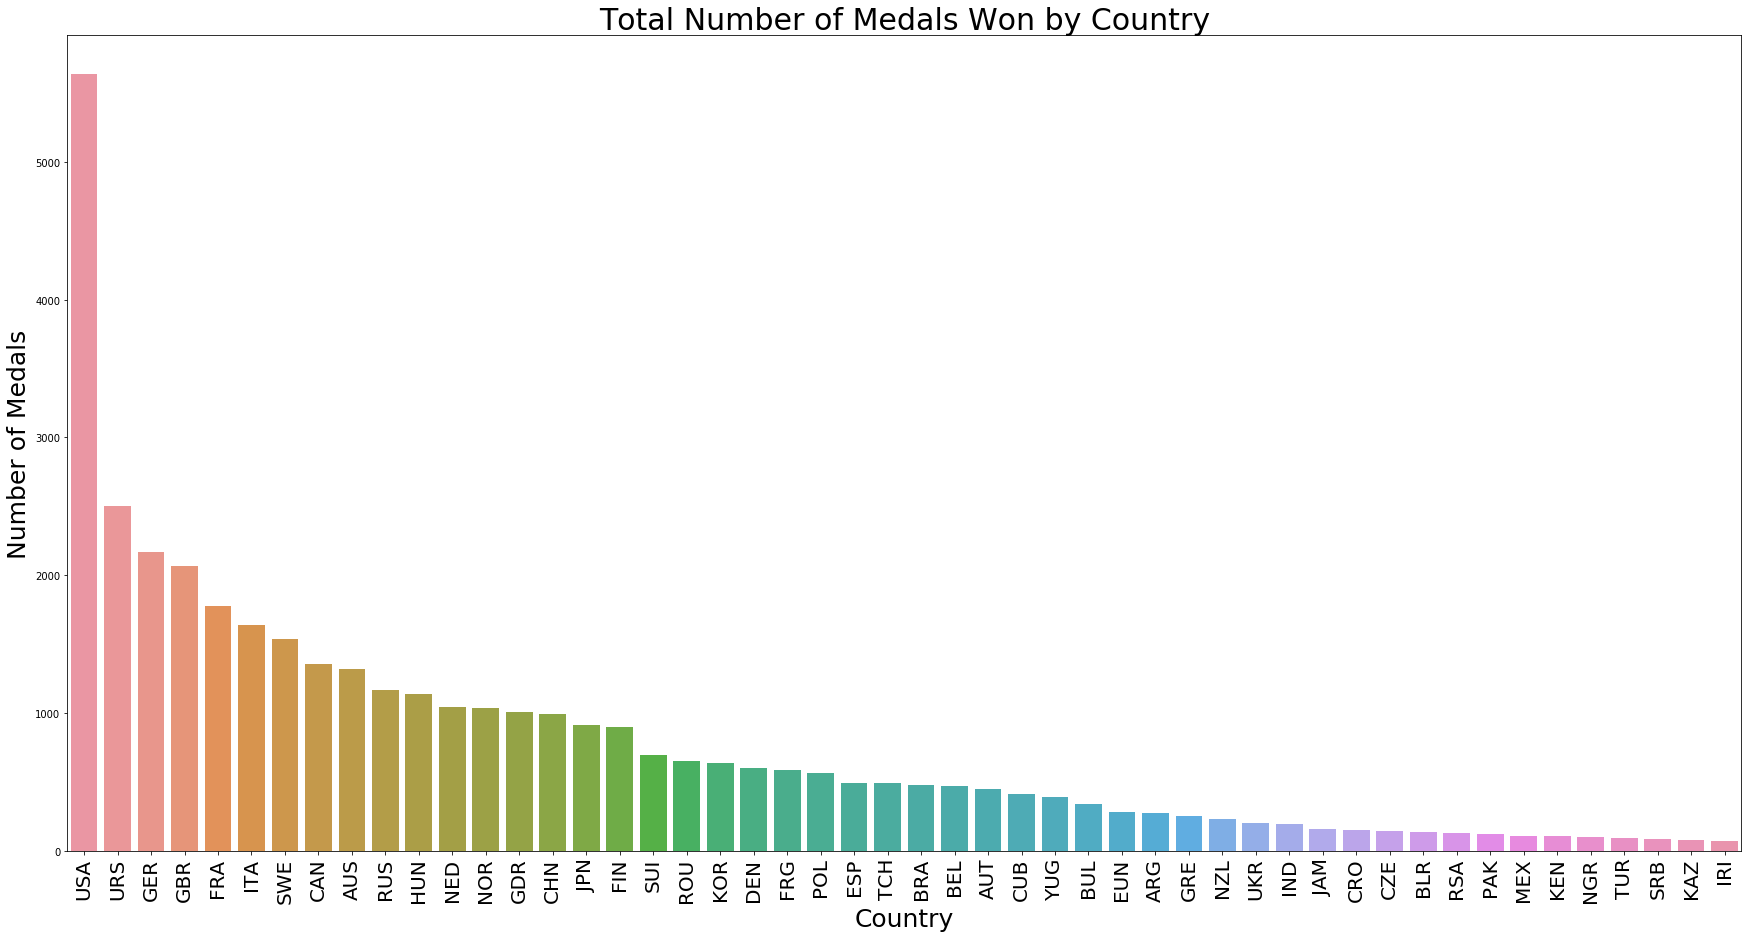

In [18]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(to_graph.head(50)['NOC'],to_graph.head(50)['Total Medals'],ci=False)
plt.xticks(rotation = 90,fontsize=20)
plt.title("Total Number of Medals Won by Country",fontsize=30)
plt.ylabel("Number of Medals",fontsize=25)
plt.xlabel("Country",fontsize=25)
plt.show()

In [108]:
medals_per_country_map.sort_values('Total Medals',ascending=False,inplace=True)
to_graph = medals_per_country_map.head(50)

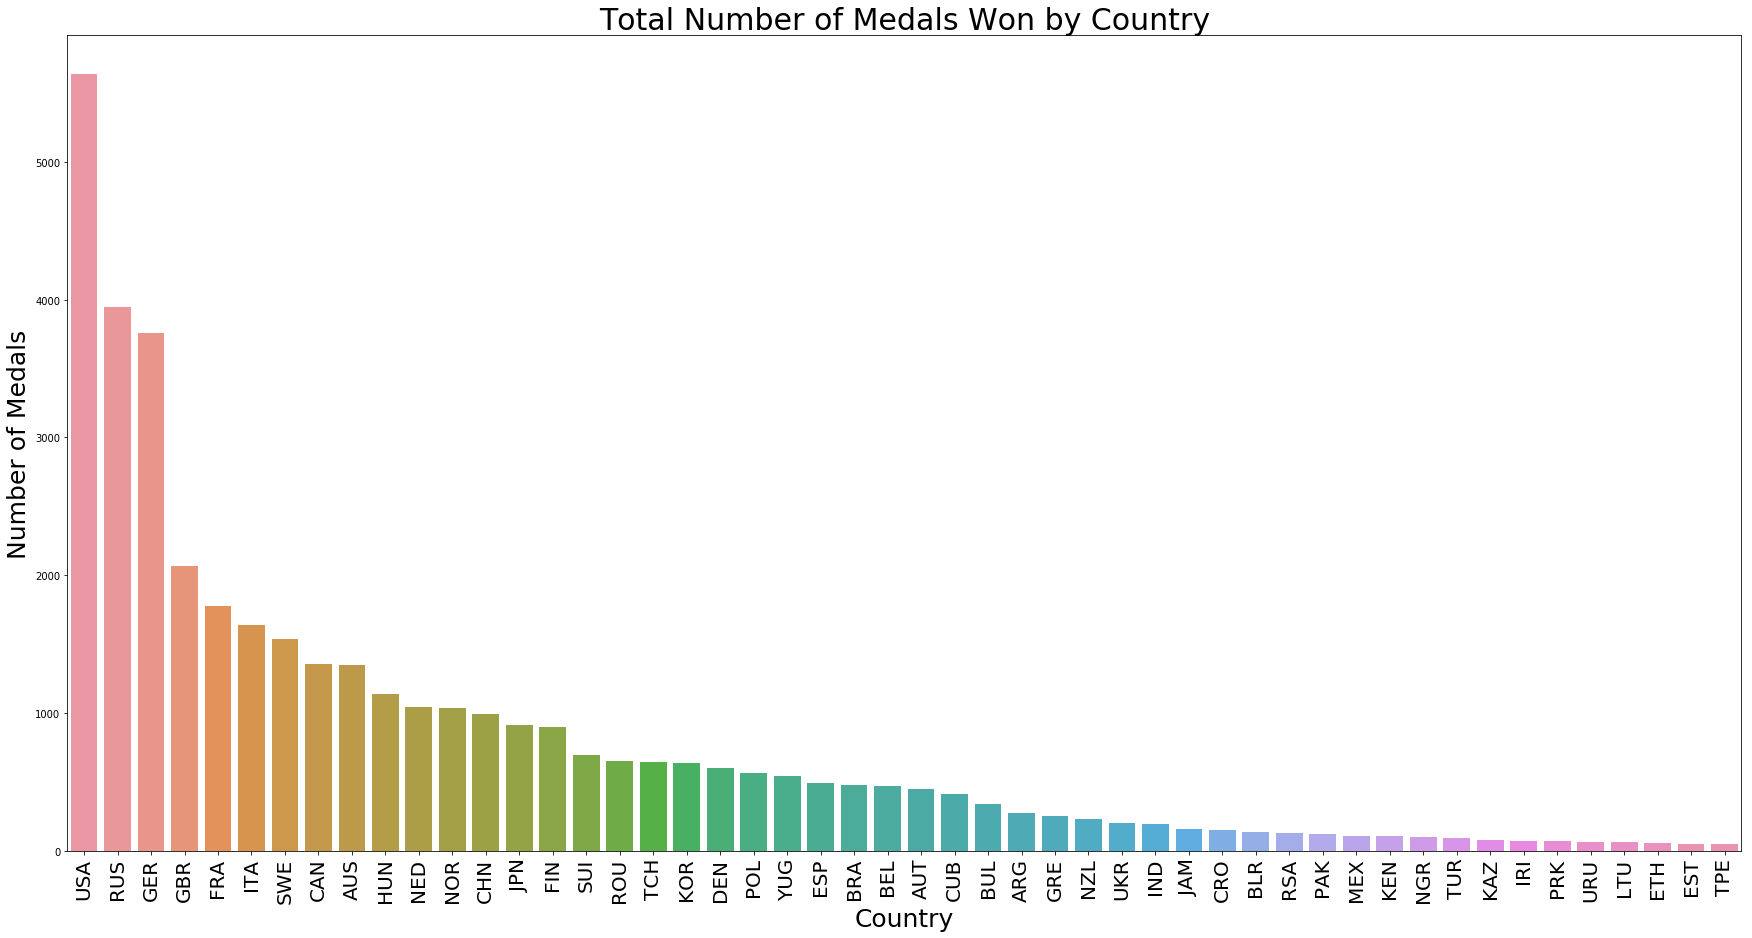

In [109]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(to_graph.head(50)['NOC'],to_graph.head(50)['Total Medals'],ci=False)
plt.xticks(rotation = 90,fontsize=20)
plt.title("Total Number of Medals Won by Country",fontsize=30)
plt.ylabel("Number of Medals",fontsize=25)
plt.xlabel("Country",fontsize=25)
plt.show()

## Proportion of Athletes Winning Medals per Country

In [19]:
total_olympians_per_country = data.NOC.value_counts()

In [20]:
total_olympians_per_country.head()

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: NOC, dtype: int64

In [21]:
propor_medals_per_country = medals_per_country_final.copy()

In [22]:
propor_medals_per_country.head()

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
215,USA,1358.0,2638.0,13216.0,1641.0,18853.0,5637.0,USA
213,URS,689.0,1082.0,3182.0,732.0,5685.0,2503.0,Russia
79,GER,746.0,745.0,7665.0,674.0,9830.0,2165.0,Germany
74,GBR,651.0,678.0,10188.0,739.0,12256.0,2068.0,UK
69,FRA,666.0,501.0,10981.0,610.0,12758.0,1777.0,France


In [23]:
to_propor = ['Bronze','Gold','None','Silver','Total Medals']
for column in to_propor:
    propor_medals_per_country[column] = (100*(propor_medals_per_country[column]/propor_medals_per_country['Total Athletes'])).round(2)

In [24]:
propor_medals_per_country.head()

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
215,USA,7.20,13.99,70.10,8.70,18853.0,29.90,USA
213,URS,12.12,19.03,55.97,12.88,5685.0,44.03,Russia
79,GER,7.59,7.58,77.98,6.86,9830.0,22.02,Germany
74,GBR,5.31,5.53,83.13,6.03,12256.0,16.87,UK
69,FRA,5.22,3.93,86.07,4.78,12758.0,13.93,France


In [25]:
propor_medals_per_country.drop(['Total Athletes'],axis=1,inplace=True)

In [26]:
propor_medals_per_country.head()

,NOC,Bronze,Gold,None,Silver,Total Medals,region
215,USA,7.20,13.99,70.10,8.70,29.90,USA
213,URS,12.12,19.03,55.97,12.88,44.03,Russia
79,GER,7.59,7.58,77.98,6.86,22.02,Germany
74,GBR,5.31,5.53,83.13,6.03,16.87,UK
69,FRA,5.22,3.93,86.07,4.78,13.93,France


In [27]:
propor_medals_per_country.sort_values('Total Medals',ascending=False,inplace=True)
to_graph = propor_medals_per_country.head(50)

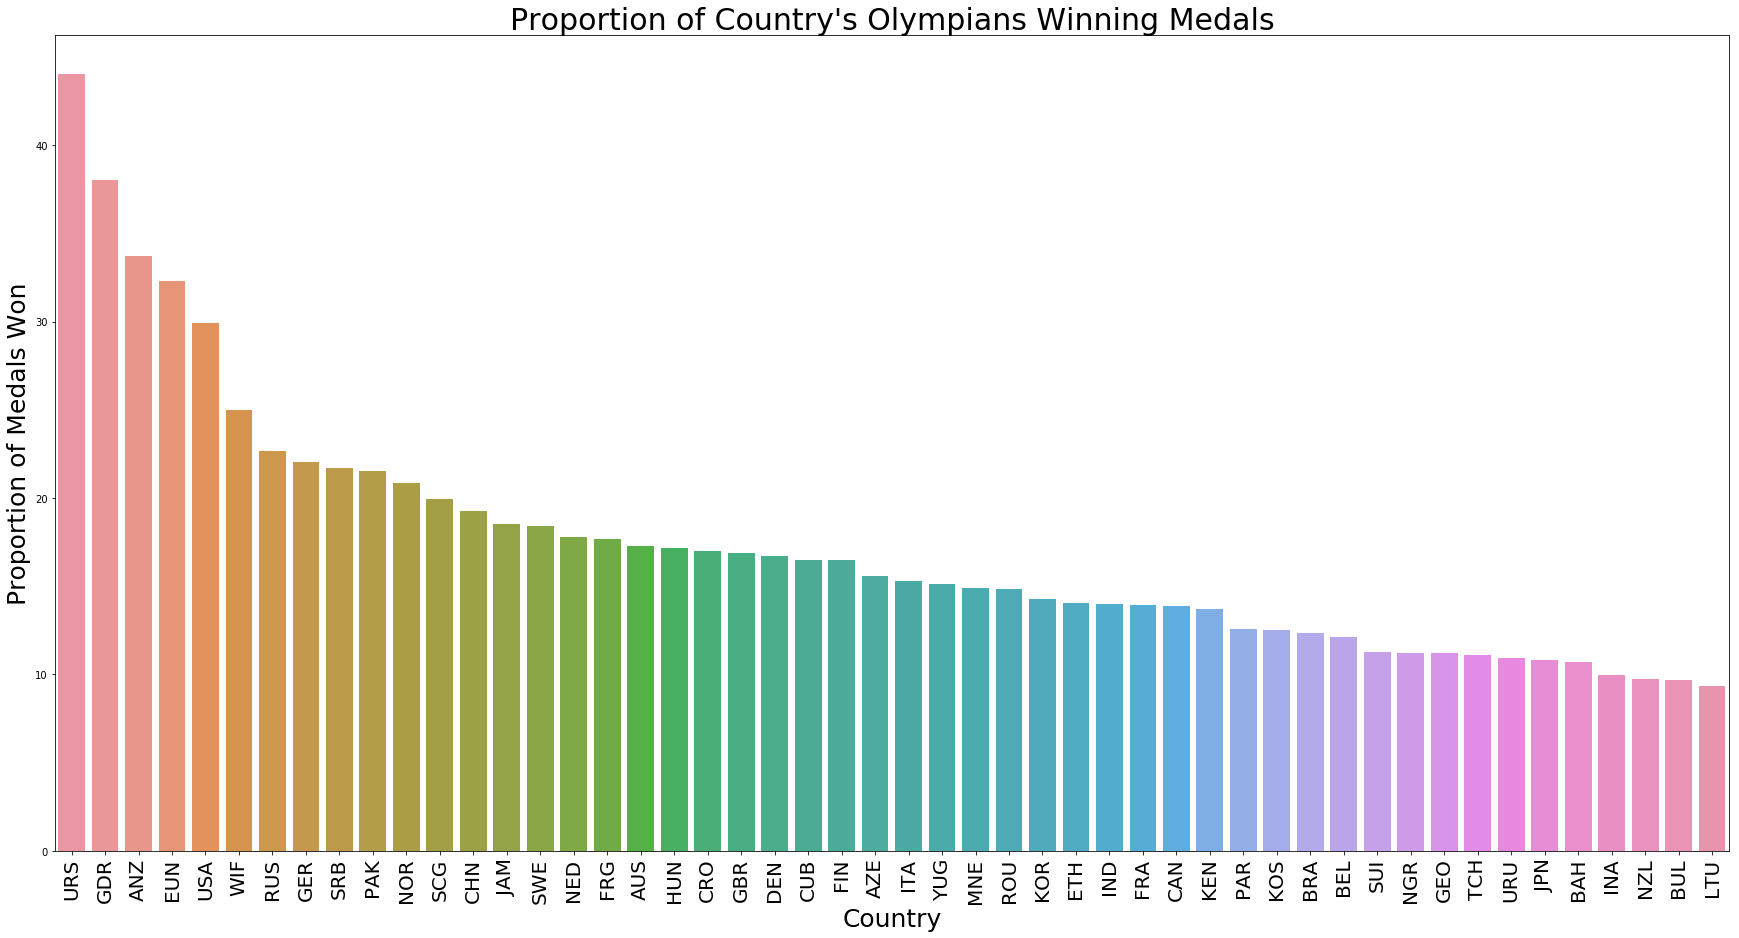

In [28]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(to_graph.head(50)['NOC'],to_graph.head(50)['Total Medals'],ci=False)
plt.xticks(rotation = 90,fontsize=20)
plt.title("Proportion of Country's Olympians Winning Medals",fontsize=30)
plt.ylabel("Proportion of Medals Won",fontsize=25)
plt.xlabel("Country",fontsize=25)
plt.show()

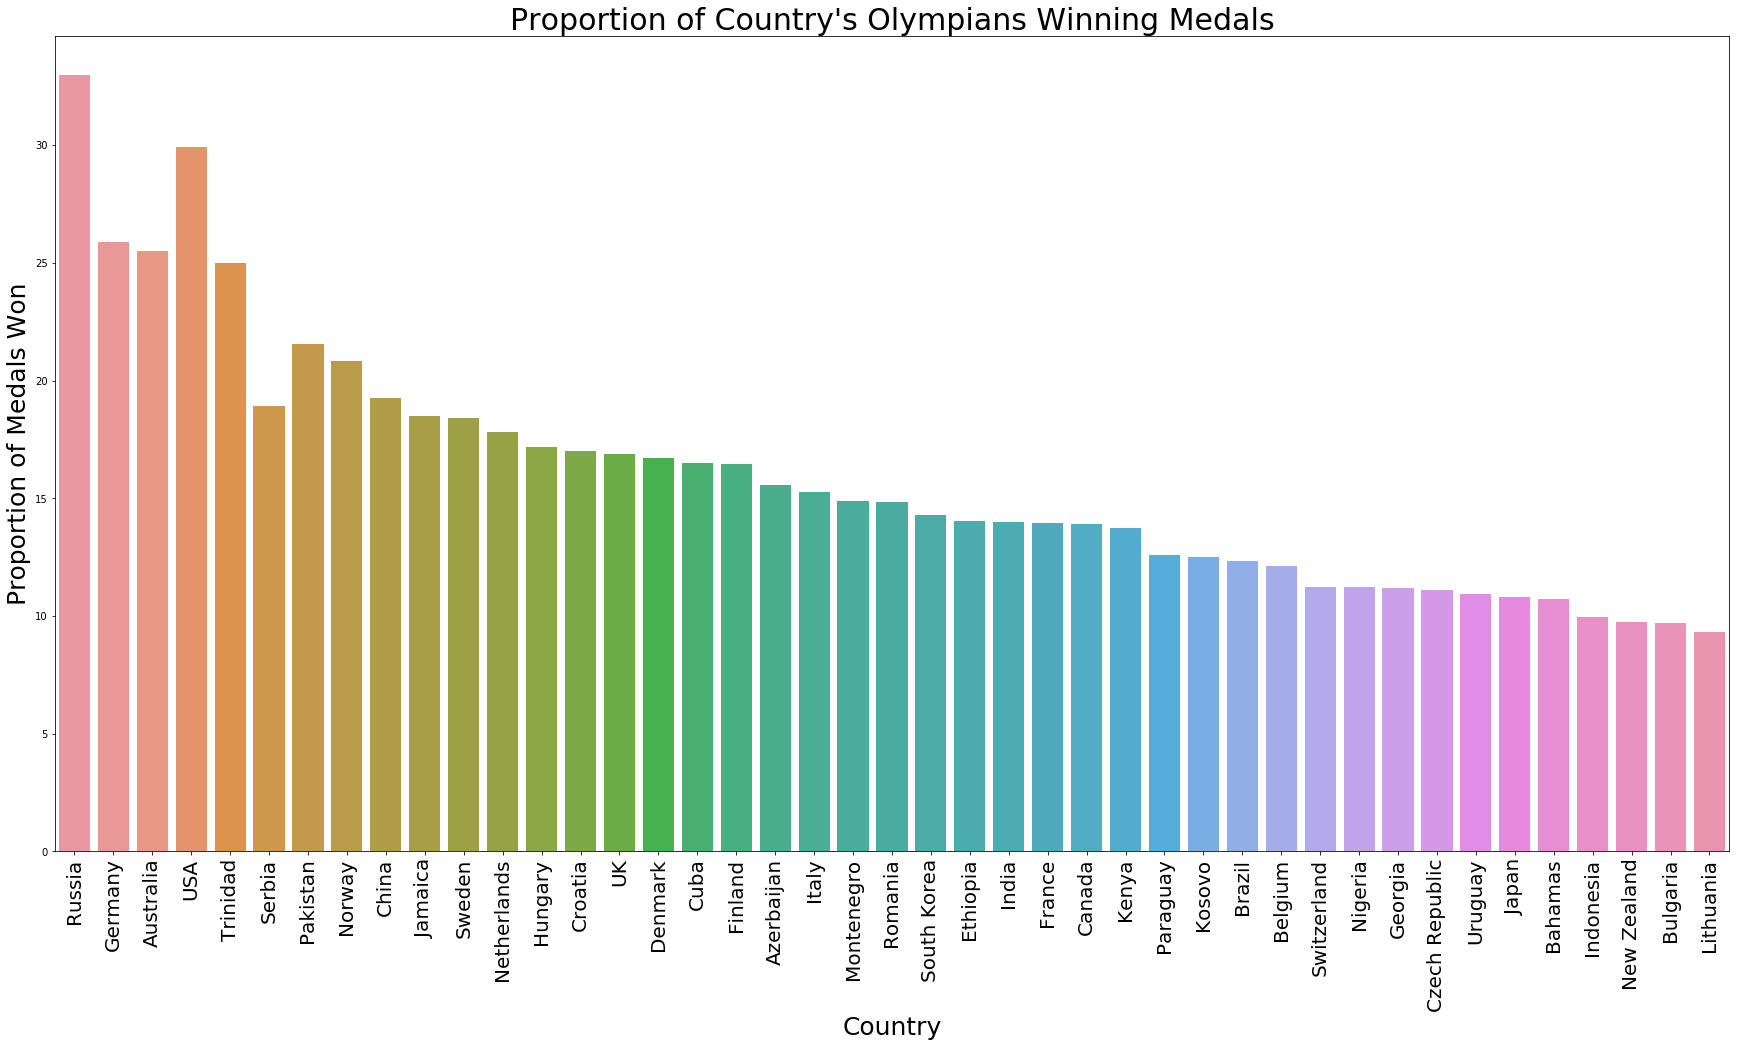

In [29]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(to_graph.head(50)['region'],to_graph.head(50)['Total Medals'],ci=False)
plt.xticks(rotation = 90,fontsize=20)
plt.title("Proportion of Country's Olympians Winning Medals",fontsize=30)
plt.ylabel("Proportion of Medals Won",fontsize=25)
plt.xlabel("Country",fontsize=25)
plt.show()

### with mapping data (multiple codes accounted for)

In [110]:
propor_map = medals_per_country_map.copy()

In [111]:
to_propor = ['Bronze','Gold','None','Silver','Total Medals']
for column in to_propor:
    propor_map[column] = (100*(propor_map[column]/propor_map['Total Athletes'])).round(2)

In [112]:
propor_map.drop(['Total Athletes'],axis=1,inplace=True)

In [113]:
propor_map.sort_values('Total Medals',ascending=False,inplace=True)
to_graph = propor_map.head(50)

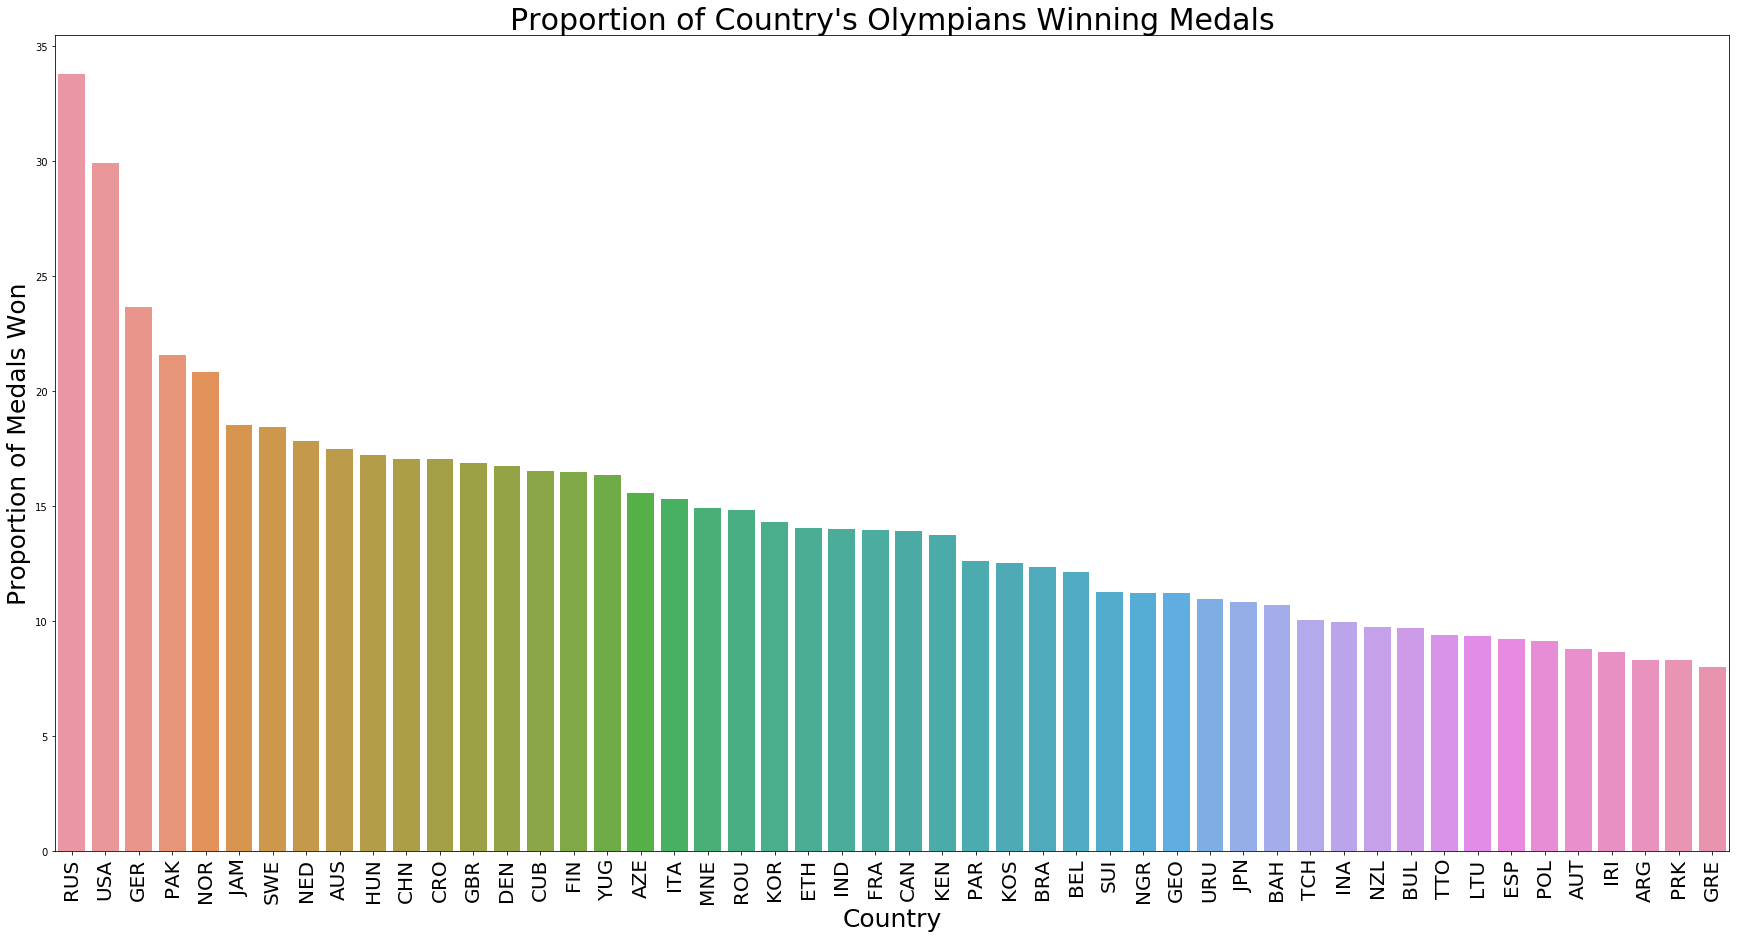

In [114]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(to_graph.head(50)['NOC'],to_graph.head(50)['Total Medals'],ci=False)
plt.xticks(rotation = 90,fontsize=20)
plt.title("Proportion of Country's Olympians Winning Medals",fontsize=30)
plt.ylabel("Proportion of Medals Won",fontsize=25)
plt.xlabel("Country",fontsize=25)
plt.show()

# Plotly

In [115]:
medals_per_country_map.head()

,NOC,Bronze,Gold,None,Silver,Total Athletes,Total Medals,region
0,USA,1358.0,2638.0,13216.0,1641.0,18853.0,5637.0,USA
200,RUS,1178.0,1599.0,7745.0,1170.0,11692.0,3947.0,Russia
196,GER,1260.0,1301.0,12127.0,1195.0,15883.0,3756.0,Germany
1,GBR,651.0,678.0,10188.0,739.0,12256.0,2068.0,UK
2,FRA,666.0,501.0,10981.0,610.0,12758.0,1777.0,France


In [134]:
def create_map(data, criteria, colorscale):
    trace = go.Choropleth(
            locations = data['region'],
            locationmode='country names',
            z = data[criteria],
            text = data['region'],
            autocolorscale =False,
            reversescale = False,
            colorscale = colorscale,
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total Medals',
                tickprefix = '')
        )

    data = [trace]
    layout = go.Layout(title = 'Total {} Medals Won by Country Over All Olympic Competitions'.format(criteria),
                       geo = dict(
                           showframe = True,
                           showlakes = False,
                           showcoastlines = True,
                           projection = dict(
                               type = 'natural earth'
                           )
                       )
                      )

    fig = dict( data=data, layout=layout )
    iplot(fig)

In [117]:
trace = go.Choropleth(
            locations = medals_per_country_map['region'],
            locationmode='country names',
            z = medals_per_country_map['Total Medals'],
            text = medals_per_country_map['region'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'rainbow',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total Medals',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Total Medals Won by Country Over All Olympic Competitions',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

In [136]:
create_map(medals_per_country_map, 'Gold', 'YlOrBr')

In [137]:
create_map(medals_per_country_map, 'Silver', 'Greys')

In [138]:
create_map(medals_per_country_map, 'Bronze', 'Reds')

## Proportion of Athletes Winning Medals by Country

In [118]:
propor_map.head()

,NOC,Bronze,Gold,None,Silver,Total Medals,region
200,RUS,10.08,13.68,66.24,10.01,33.76,Russia
0,USA,7.20,13.99,70.10,8.70,29.90,USA
196,GER,7.93,8.19,76.35,7.52,23.65,Germany
29,PAK,6.05,7.47,78.47,8.01,21.53,Pakistan
7,NOR,5.93,7.62,79.17,7.28,20.83,Norway


In [119]:
trace = go.Choropleth(
            locations = propor_map['region'],
            locationmode='country names',
            z = propor_map['Total Medals'],
            text = propor_map['region'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'rainbow',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total Medals',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = "Proportion of Country's Athletes Earning Olympic Medals",
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

In [139]:
create_map(propor_map, 'Gold', 'YlOrBr')

In [140]:
create_map(propor_map, 'Silver', 'Greys')

In [141]:
create_map(propor_map, 'Bronze', 'Reds')